In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Load the Iris dataset
data = pd.read_csv('/content/IrisNew.csv')
df = pd.DataFrame(data, columns=["Sepal Length","Sepal Width","Petal Length","Petal Width","Class"])
#print(df)


#split the data into training and testing
X = df.values[:,0:4] # first 4 columns are independent variables
Y = df.values[:,4] # last column is dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=100)
#test size = 70% training and 30 percent testing

# Create and evaluate classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

results = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": cm,
        "Classification Report": report,
    }

# Display the results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])



Model: Logistic Regression
Accuracy: 0.9777777777777777
Recall: 0.9777777777777779
F1 Score: 0.9789819376026273
Confusion Matrix:
[[13  0  0]
 [ 0 14  1]
 [ 0  0 17]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Model: Decision Tree
Accuracy: 0.9555555555555556
Recall: 0.9581699346405229
F1 Score: 0.9581699346405229
Confusion Matrix:
[[13  0  0]
 [ 0 14  1]
 [ 0  1 16]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.93      0.93      0.93        15
   virginica       0.94      0.94      0.94        17

    accuracy               

In [12]:
#function for confusion matrix
def model_statistics(model, model_name):
    # Confusion Matrix
    model_probs = model.predict(X_test)
    cm = confusion_matrix(y_test, model_probs)
    classification_rep = classification_report(y_test, model_probs)
    accuracy = accuracy_score(y_test, model_probs)
    recall = recall_score(y_test, model_probs, average="macro")

    print(f"{model_name} Classification Report:\n {classification_rep}")
    print(f"{model_name} Accuracy:\n {accuracy}")
    print(f"{model_name} Recall: \n {recall}")

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="BuGn")
    plt.savefig(f"{model_name}.png")
    plt.show()


Naive_Bayes Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Naive_Bayes Accuracy:
 0.9777777777777777
Naive_Bayes Recall: 
 0.9777777777777779


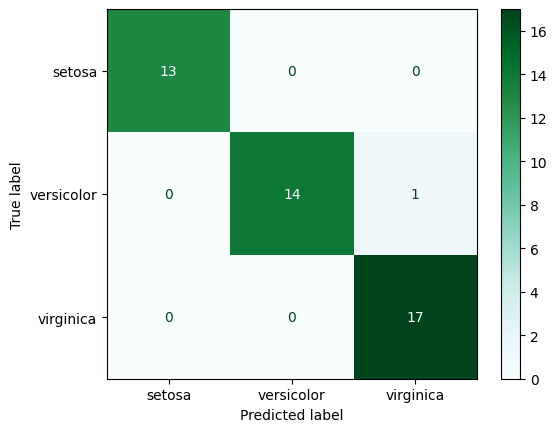

Linear_Discriminant_Analysis Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Linear_Discriminant_Analysis Accuracy:
 1.0
Linear_Discriminant_Analysis Recall: 
 1.0


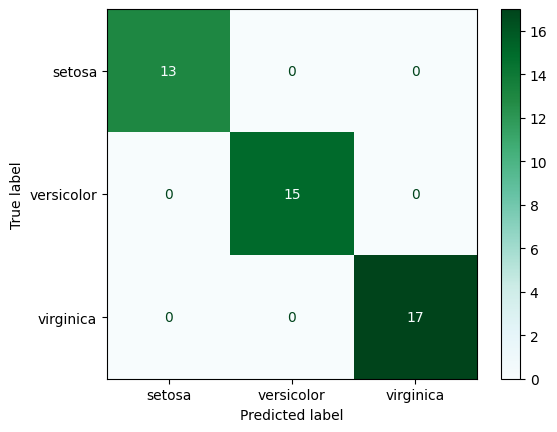

In [13]:
# Creating and training Naïve Bayes classifier
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
model_statistics(NB_model, "Naive_Bayes")


# Creating and training Linear Discriminant Analysis (LDA) classifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
model_statistics(LDA_model, "Linear_Discriminant_Analysis")
